# Exercise 2  -  Deep Neural Networks with Keras

Guadagnini Michele - 1230663

Lambertini Alessandro - 1242885

Pagano Alice - 1236916

Puppin Michele - 1227474

In [1]:
import math
import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

#reproducibility
np.random.seed(12345)

perc_train = 0.8

Using TensorFlow backend.


In [2]:
#import datafile
fname = 'secretkeys_exe.csv'
dataset = np.loadtxt(fname, delimiter=',', dtype=int)
N = len(dataset)
print("Length of the dataset:", N)

L = len(str(dataset[0][0]))
D = 9     #digits
N_train = int(perc_train*N)
N_test = N-N_train

#divide dataset in train and test
dataset_train = dataset[:N_train]
dataset_test = dataset[N_train:]

print("Length of a key:", L)
print("number of digits:", D)

Length of the dataset: 3000
Length of a key: 7
number of digits: 9


In [3]:
#one-hot encoding
def expand(S):   
    if (len(str(S))!=L):
        print('mismatch!')
        return []
    x = np.zeros(L*D, dtype=int)
    p = 10**(L-1)
    j = 0
    while j<L:
        q = int(S/p)    #first digit
        # 1 to 9 --> 0 to 8, that's why q-1 in the following line
        x[j*D+(q-1)] = 1
        j += 1
        S = S - q*p
        p = int(p/10)
    return x

x_train = [None]*N_train 
for i in range(N_train):
    x_train[i] = expand(dataset_train[:,0][i])

x_test = [None]*N_test
for i in range(N_test):
    x_test[i] = expand(dataset_test[:,0][i])    

x_train = np.array(x_train)
y_train = np.array(dataset_train[:,-1])

x_test = np.array(x_test)
y_test = np.array(dataset_test[:,-1])

In [4]:
#implementing the architecture of the network
model = Sequential()   #sequence of dense layers
model.add(Dense(L*D, input_shape=(L*D,), activation='relu'))
model.add(Dense(max(10, int(L*D/2)), activation='relu'))  #layer with half of the nodes and >= 10
model.add(Dense(max(6, int(L*D/4)), activation='relu'))

model.add(Dropout(0.4)) #removing some nodes
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_2 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
#Fitting the model
fit = model.fit(x_train, y_train, epochs=80, batch_size=20, validation_data=(x_test, y_test), verbose=False)

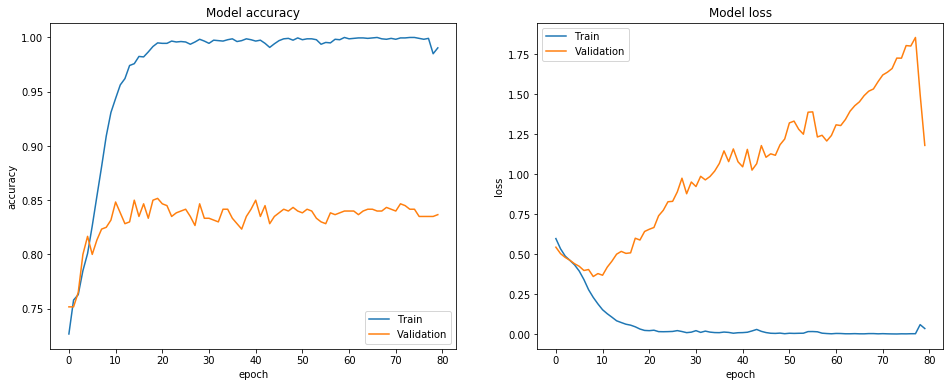

In [6]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy for training and validation(test)
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss for training and validation(test)
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [7]:
print('Max accuracy up to 20 epochs:', np.array(fit.history['val_accuracy'][:20]).max())

Max accuracy up to 20 epochs: 0.8516666889190674


### **1. Data augmentation**

In [8]:
L_dataset_train = np.zeros( (N_train*L, 2), dtype=int )

# rotating the digits of every key
for key,ind in zip(dataset_train, range(len(dataset_train))):
    for i in range(L):
        L_dataset_train[ind*L+i][0] = int( str(key[0])[i:]+str(key[0])[:i] )
        L_dataset_train[ind*L+i][1] = key[1]

print("Original shape of dataset:", dataset_train.shape)
print("New shape of dataset:", L_dataset_train.shape)

np.random.shuffle(L_dataset_train)

Original shape of dataset: (2400, 2)
New shape of dataset: (16800, 2)


In [9]:
L_x_train = [None]*(N_train*L)
for i in range(N_train*L):
    L_x_train[i] = expand(L_dataset_train[:,0][i])
L_x_train = np.array(L_x_train)
L_y_train = np.array(L_dataset_train[:,-1])

In [10]:
#implementing the architecture of the network
model = Sequential()   #sequence of dense layers
model.add(Dense(L*D, input_shape=(L*D,), activation='relu'))
model.add(Dense(max(10, int(L*D/2)), activation='relu'))  #layer with half of the nodes and >= 10
model.add(Dense(max(6, int(L*D/4)), activation='relu'))

model.add(Dropout(0.2)) #removing some nodes
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 63)                4032      
_________________________________________________________________
dense_6 (Dense)              (None, 31)                1984      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                480       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 6,512
Trainable params: 6,512
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#Fitting again with more data
fit = model.fit(L_x_train, L_y_train, epochs=80, batch_size=20, validation_data=(x_test, y_test), verbose=False)

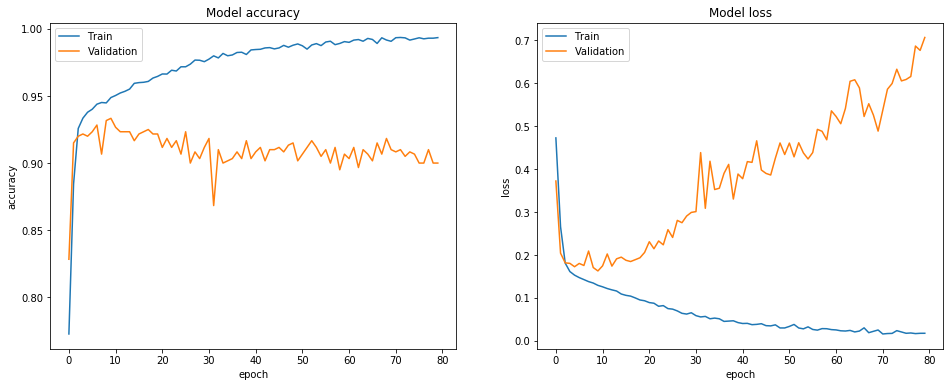

In [12]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy for training and validation(test)
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss for training and validation(test)
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [13]:
print('Max accuracy up to 20 epochs:', np.array(fit.history['val_accuracy'][:20]).max())

Max accuracy up to 20 epochs: 0.9333333373069763


### **2. Grid search over hyper-parameters**

In [14]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers

def compile_model(optimizer=optimizers.Adam(),activation='relu',dropout_rate=0.2):
    # create the mode
    mod = Sequential() 
    mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
    mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
    mod.add(Dense(max(6, int(L*D/4)), activation=activation))

    mod.add(Dropout(dropout_rate)) #removing some nodes
    mod.add(Dense(1, activation='sigmoid'))
    # compile the model
    mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return mod

### Optimizers

In [15]:
batch_size = 100

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=60, 
                        batch_size=batch_size, 
                        verbose=False)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad','Adam', 'Adamax', 'Nadam']

# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=4, cv=4)
grid_result = grid.fit(L_x_train,L_y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_optimizer = grid_result.best_params_['optimizer']

Best: 0.894583 using {'optimizer': 'Adagrad'}
0.811964 (0.008947) with: {'optimizer': 'SGD'}
0.894286 (0.005008) with: {'optimizer': 'RMSprop'}
0.894583 (0.005653) with: {'optimizer': 'Adagrad'}
0.886964 (0.003097) with: {'optimizer': 'Adam'}
0.893512 (0.007447) with: {'optimizer': 'Adamax'}
0.885833 (0.005524) with: {'optimizer': 'Nadam'}


### Batch size 

In [16]:
batch_size = 100

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)

# define the grid search parameters
batch_size = [50, 100, 150]

# define parameter dictionary
param_grid = dict(batch_size=batch_size)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(L_x_train,L_y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_batch_size = grid_result.best_params_['batch_size']

Best: 0.893690 using {'batch_size': 50}
0.893690 (0.005052) with: {'batch_size': 50}
0.889464 (0.003023) with: {'batch_size': 100}
0.892679 (0.004528) with: {'batch_size': 150}


In [17]:
def compile_model(optimizer=optimizers.Adam(),activation='relu',dropout_rate=0.2):
    # create the mode
    mod = Sequential() 
    mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
    mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
    mod.add(Dense(max(6, int(L*D/4)), activation=activation))

    mod.add(Dropout(dropout_rate)) #removing some nodes
    mod.add(Dense(1, activation='sigmoid'))
    # compile the model
    mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return mod

### Activation

In [18]:
batch_size = 100

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)

# define the grid search parameters
activation = ['softmax', 'softsign', 'relu', 'tanh', 'sigmoid', 'linear']
# define parameter dictionary
param_grid = dict(activation=activation)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=2, cv=4)
grid_result = grid.fit(L_x_train,L_y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_activation = grid_result.best_params_['activation']    

Best: 0.909821 using {'activation': 'softmax'}
0.909821 (0.006584) with: {'activation': 'softmax'}
0.891429 (0.001552) with: {'activation': 'softsign'}
0.890298 (0.005467) with: {'activation': 'relu'}
0.897917 (0.007460) with: {'activation': 'tanh'}
0.818333 (0.041289) with: {'activation': 'sigmoid'}
0.764405 (0.005636) with: {'activation': 'linear'}


In [19]:
def compile_model(optimizer=optimizers.Adam(),activation='relu',dropout_rate=0.2):
    # create the mode
    mod = Sequential() 
    mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
    mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
    mod.add(Dense(max(6, int(L*D/4)), activation=activation))

    mod.add(Dropout(dropout_rate)) #removing some nodes
    mod.add(Dense(1, activation='sigmoid'))
    # compile the model
    mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return mod

### Dropout

In [20]:
batch_size = 100

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=50, 
                        batch_size=batch_size, 
                        verbose=False)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4]
# define parameter dictionary
param_grid = dict(dropout_rate=dropout_rate)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=4, cv=4)
grid_result = grid.fit(L_x_train,L_y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_dropout_rate = grid_result.best_params_['dropout_rate']    

Best: 0.893631 using {'dropout_rate': 0.4}
0.892143 (0.004096) with: {'dropout_rate': 0.0}
0.889583 (0.009641) with: {'dropout_rate': 0.1}
0.892976 (0.005231) with: {'dropout_rate': 0.2}
0.891667 (0.004282) with: {'dropout_rate': 0.3}
0.893631 (0.002799) with: {'dropout_rate': 0.4}


### All 

In [21]:
mod = Sequential() 

activation = best_activation
mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
mod.add(Dense(max(6, int(L*D/4)), activation=activation))

dropout_rate = best_dropout_rate
mod.add(Dropout(dropout_rate)) #removing some nodes
mod.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer
# compile the model
mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size
epochs = 300
#Fitting again with more data
fit = mod.fit(L_x_train, L_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=False)

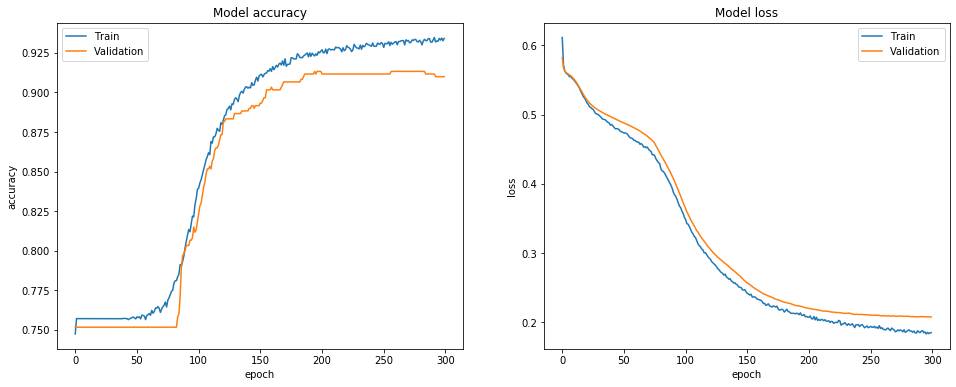

In [22]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy for training and validation(test)
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss for training and validation(test)
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [23]:
print('Max accuracy up to 300 epochs:', np.array(fit.history['val_accuracy'][:300]).max())

Max accuracy up to 300 epochs: 0.9133333563804626


In [24]:
mod = Sequential() 

activation = 'relu'#best_activation
mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
mod.add(Dense(max(6, int(L*D/4)), activation=activation))

dropout_rate = best_dropout_rate
mod.add(Dropout(dropout_rate)) #removing some nodes
mod.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer
# compile the model
mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size
epochs = 300
#Fitting again with more data
fit = mod.fit(L_x_train, L_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=False)

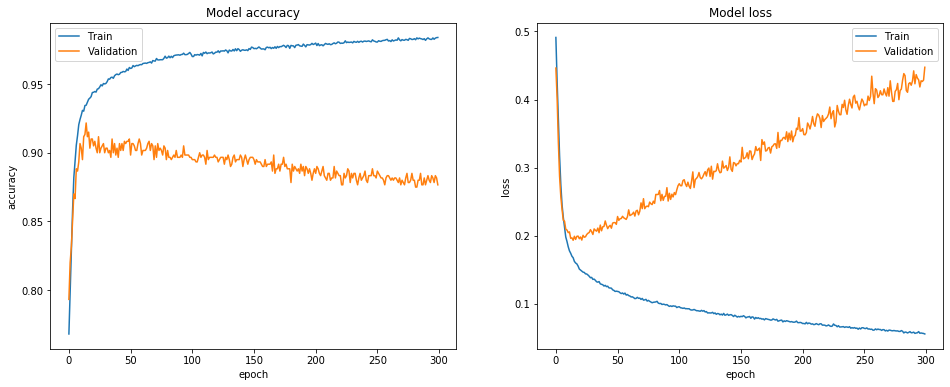

In [25]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy for training and validation(test)
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss for training and validation(test)
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [26]:
print('Max accuracy up to 300 epochs:', np.array(fit.history['val_accuracy'][:300]).max())

Max accuracy up to 300 epochs: 0.92166668176651


### **3. Data rescaling**

In [27]:
L_x_rescale_train = (L_x_train - L_x_train.mean()) / L_x_train.std()
x_rescale_test = (x_test - L_x_train.mean()) / L_x_train.std()

In [28]:
mod = Sequential() 

activation = best_activation
mod.add(Dense(L*D, input_shape=(L*D,), activation=activation))
mod.add(Dense(max(10, int(L*D/2)), activation=activation))  #layer with half of the nodes and >= 10
mod.add(Dense(max(6, int(L*D/4)), activation=activation))

dropout_rate = best_dropout_rate
mod.add(Dropout(dropout_rate)) #removing some nodes
mod.add(Dense(1, activation='sigmoid'))

optimizer = best_optimizer
# compile the model
mod.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

batch_size = best_batch_size
epochs = 300
#Fitting again with more data
fit = mod.fit(L_x_rescale_train, L_y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_rescale_test, y_test), verbose=False)

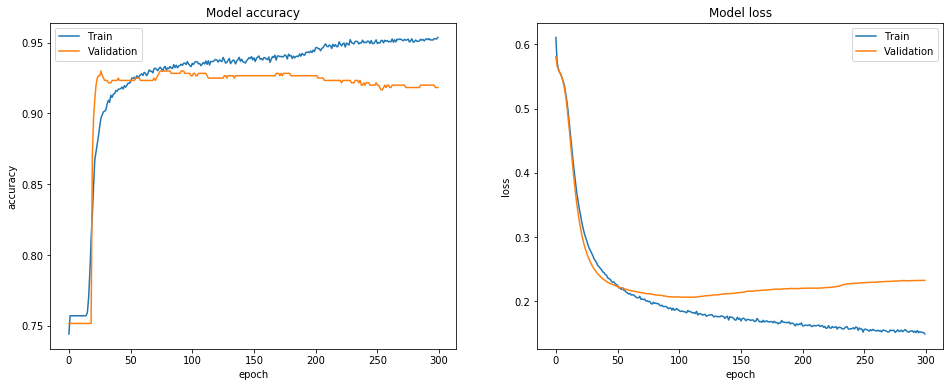

In [29]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# accuracy for training and validation(test)
ax1.plot(fit.history['accuracy'])
ax1.plot(fit.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['Train', 'Validation'])

# loss for training and validation(test)
ax2.plot(fit.history['loss'])
ax2.plot(fit.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [30]:
print('Max accuracy up to 300 epochs:', np.array(fit.history['val_accuracy'][:300]).max())

Max accuracy up to 300 epochs: 0.9300000071525574
